In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
if not os.path.isdir('models'):
  os.mkdir('models')
# checking TensorFlow version and GPU usage
print('Tensorflow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

Tensorflow version: 2.4.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


In [3]:
# setting path to the main directory
main_dir = r"C:\Tensorflow2\workspace\Classifier\Training_imgs"
# Setting path to the training directory
train_dir = os.path.join(main_dir, 'train')
# Setting path to the test directory
test_dir = os.path.join(main_dir, 'test')
# Directory with train covid images
train_Empty_dir = os.path.join(train_dir, 'Empty')
# Directory with train normal images
train_Full_dir = os.path.join(train_dir, 'Full')
# Directory with test covid image
test_Empty_dir = os.path.join(test_dir, 'Empty')
# Directory with test normal image
test_Full_dir = os.path.join(test_dir, 'Full')

In [4]:
# Creating a list of filenames in each directory
train_Empty_names = os.listdir(train_Empty_dir)
print(train_Empty_names[:10])  # printing a list of the first 10 filenames

train_Full_names = os.listdir(train_Full_dir)
print(train_Full_names[:10])

test_Empty_names = os.listdir(test_Empty_dir)
print(test_Empty_names[:10])

test_Full_names = os.listdir(test_Full_dir)
print(test_Full_names[:10])

# Printing total number of images present in each set
print('Total no of images in training set:', len(train_Empty_names
                                                + train_Full_names))
print("Total no of images in test set:", len(test_Empty_names
                                            + test_Full_names))

['Empty_ (1).jpg', 'Empty_ (10).jpg', 'Empty_ (100).jpg', 'Empty_ (101).jpg', 'Empty_ (102).jpg', 'Empty_ (103).jpg', 'Empty_ (104).jpg', 'Empty_ (105).jpg', 'Empty_ (106).jpg', 'Empty_ (107).jpg']
['Full_ (1).jpg', 'Full_ (10).jpg', 'Full_ (100).jpg', 'Full_ (101).jpg', 'Full_ (102).jpg', 'Full_ (103).jpg', 'Full_ (104).jpg', 'Full_ (105).jpg', 'Full_ (106).jpg', 'Full_ (107).jpg']
['Empty_(441).jpg', 'Empty_(442).jpg', 'Empty_(443).jpg', 'Empty_(444).jpg', 'Empty_(445).jpg', 'Empty_(446).jpg', 'Empty_(447).jpg', 'Empty_(448).jpg', 'Empty_(449).jpg', 'Empty_(450).jpg']
['Full_ (201).jpg', 'Full_ (202).jpg', 'Full_ (203).jpg', 'Full_ (204).jpg', 'Full_ (205).jpg', 'Full_ (206).jpg', 'Full_ (207).jpg', 'Full_ (208).jpg', 'Full_ (249).jpg', 'Full_ (250).jpg']
Total no of images in training set: 880
Total no of images in test set: 80


In [5]:
# Data Visualization
import matplotlib.image as mpimg
# Setting the no of rows and columns
ROWS = 4
COLS = 4
# Setting the figure size
fig = plt.gcf()
# get current figure; allows us to get a reference to current figure when using pyplot
fig.set_size_inches(12, 12)

# get the directory to each image file in the trainset
Empty_pic = [os.path.join(train_Empty_dir, filename) for filename in train_Empty_names[:8]]
Full_pic = [os.path.join(train_Full_dir, filename) for filename in train_Full_names[:8]]
print(Empty_pic)
print(Full_pic)
# merge covid and normal lists
merged_list = Empty_pic + Full_pic
print(merged_list)

['C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (1).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (10).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (100).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (101).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (102).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (103).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (104).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Empty\\Empty_ (105).jpg']
['C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Full\\Full_ (1).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Full\\Full_ (10).jpg', 'C:\\Tensorflow2\\workspace\\Classifier\\Training_imgs\\train\\Full\\Full_ (100).jpg', 'C:\\Tensorflow2\\workspace\\Cl

<Figure size 864x864 with 0 Axes>

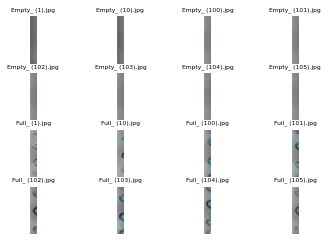

In [6]:
# Plotting the images in the merged list
for i, img_path in enumerate(merged_list):
    # getting the filename from the directory
    data = img_path.split('\\', 7)[7]
    # creating a subplot of images with the no. of rows and colums with index no
    sp = plt.subplot(ROWS, COLS, i+1)
    # turn off axis
    sp.axis('Off')
    # reading the image data to an array
    img = mpimg.imread(img_path)
    # setting title of plot as the filename
    sp.set_title(data, fontsize=6)
    # displaying data as image
    plt.imshow(img, cmap='gray')
    
plt.show()  # display the plot

In [7]:
# Data Preprocessing and Augmentation
# Generate training, testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,  # using 20% of training data for validation 
                                zoom_range=0.2,
                                horizontal_flip=True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

In [8]:
# Awesome HyperParameters!!!
TARGET_SIZE = (180,25)#(200, 200)
BATCH_SIZE = 10#32
CLASS_MODE = 'binary'  # for two classes; categorical for over 2 classes

# Connecting the ImageDataGenerator objects to our dataset
train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=TARGET_SIZE,
                                                 subset='training',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE)

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size=TARGET_SIZE,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode=CLASS_MODE)
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode=CLASS_MODE)

Found 705 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [9]:
# Get the class indices
train_generator.class_indices


{'Empty': 0, 'Full': 1}

In [10]:
# Get the image shape
train_generator.image_shape

(180, 25, 3)

In [11]:
# Building CNN Model
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu',
                input_shape=(180, 25, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 25, 32)       2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 6, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 6, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 17280)             0

In [12]:
# Compile the Model
model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the Model
history = model.fit(train_generator,
          epochs=50,
          validation_data=validation_generator,
          callbacks=[
          # Stopping our training if val_accuracy doesn't improve after 20 epochs
          tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                           patience=20),
          # Saving the best weights of our model in the model directory
        
          # We don't want to save just the weight, but also the model architecture
          tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                           save_best_only=True,
                                           save_weights_only=False,
                                           monitor='val_accuracy'
                                             )
    ])

Epoch 1/50
71/71 [==============================] - 5s 29ms/step - loss: 0.7525 - accuracy: 0.5313 - val_loss: 0.6520 - val_accuracy: 0.8000
Epoch 2/50
71/71 [==============================] - 1s 19ms/step - loss: 0.5432 - accuracy: 0.8042 - val_loss: 0.5914 - val_accuracy: 0.7257
Epoch 3/50
71/71 [==============================] - 1s 19ms/step - loss: 0.5419 - accuracy: 0.7443 - val_loss: 0.3226 - val_accuracy: 0.8914
Epoch 4/50
71/71 [==============================] - 1s 19ms/step - loss: 0.2281 - accuracy: 0.9028 - val_loss: 0.3037 - val_accuracy: 0.8971
Epoch 5/50
71/71 [==============================] - 1s 19ms/step - loss: 0.1629 - accuracy: 0.9587 - val_loss: 0.5370 - val_accuracy: 0.7314
Epoch 6/50
71/71 [==============================] - 1s 19ms/step - loss: 0.4594 - accuracy: 0.8154 - val_loss: 0.4851 - val_accuracy: 0.7886
Epoch 7/50
71/71 [==============================] - 1s 19ms/step - loss: 0.5573 - accuracy: 0.7505 - val_loss: 0.5812 - val_accuracy: 0.8457
Epoch 8/50
71

In [14]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

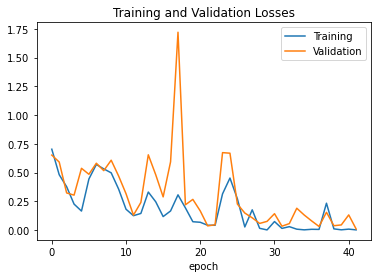

In [15]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

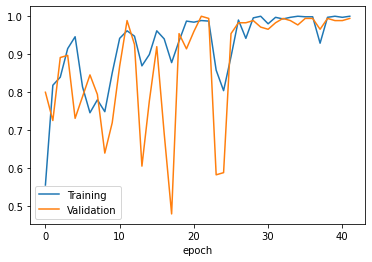

In [16]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [19]:
# loading the best perfoming model
model = tf.keras.models.load_model(r'C:\Tensorflow2\workspace\Classifier\models\model_1.000.h5')

# Getting test accuracy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

8/8 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 1.0000
Test loss: 0.022225964814424515 Test Acc: 1.0


In [21]:
# Making Prediction fo all Images in Test-Folder
import numpy as np
import glob
import os
from keras.preprocessing import image as k_image

# load and resize image to 200x200
Folder = ['Empty', 'Full'] # all Categories-Folders
for fo in Folder:
    pfad = os.path.join(r'C:\Tensorflow2\workspace\Classifier\Training_imgs\test', fo ,'*.jpg')
    test_images = glob.glob(pfad)
    #print(test_images)
    for image in test_images:
        test_image = k_image.load_img(image,target_size=(180, 25))

        # convert image to numpy array
        images = k_image.img_to_array(test_image)
        # expand dimension of image
        images = np.expand_dims(images, axis=0)
        # making prediction with model
        prediction = model.predict(images)
    
        if prediction == 0:
          print(image,' detected as Empty')
        else:
          print(image,' detected as Full')

C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(441).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(442).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(443).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(444).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(445).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(446).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(447).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(448).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(449).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Training_imgs\test\Empty\Empty_(450).jpg  detected as Empty
C:\Tensorflow2\workspace\Classifier\Trai